# AutoMl - Email benchmark - v1

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca AutoML Pycaret
from pycaret.classification import *

# Versões dos pacotes usados neste jupyter notebook
#%reload_ext watermark
#%watermark -a "Verções bibliotecas" --iversions

# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

import warnings
warnings.filterwarnings("ignore")

# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.8.15


# Base dados

In [2]:
# Base geral
data = pd.read_csv("email_automl_benchmark_v1.csv")
data

,Unnamed: 0,email,target
0,0,stacey74@yahoo.com,0
1,1,jessica90@yahoo.com,0
2,2,johnhunter@yahoo.com,0
3,3,traci56@jackson.com,0
4,4,stacyball@hotmail.com,0
...,...,...,...
999995,999995,antonio75@hall.com,0
999996,999996,hillmary@reynolds-matthews.com,0
999997,999997,tiffanyanderson@rogers-harrison.net,0
999998,999998,matthewward@morris-russo.com,0


In [3]:
# Visualizando os 5 primeiros dados
data.head(5)

,Unnamed: 0,email,target
0,0,stacey74@yahoo.com,0
1,1,jessica90@yahoo.com,0
2,2,johnhunter@yahoo.com,0
3,3,traci56@jackson.com,0
4,4,stacyball@hotmail.com,0


In [4]:
# Visualizando os 5 últimos dados
data.tail(5)

,Unnamed: 0,email,target
999995,999995,antonio75@hall.com,0
999996,999996,hillmary@reynolds-matthews.com,0
999997,999997,tiffanyanderson@rogers-harrison.net,0
999998,999998,matthewward@morris-russo.com,0
999999,999999,ngraham@ayala-elliott.com,0


In [5]:
# Visualizando linhas e colunas
data.shape

(1000000, 3)

In [6]:
# Informações dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1000000 non-null  int64 
 1   email       1000000 non-null  object
 2   target      1000000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 22.9+ MB


In [7]:
# Tipo dados
data.dtypes

Unnamed: 0     int64
email         object
target         int64
dtype: object

In [8]:
# Amostra simples 5 
data.sample(5)

,Unnamed: 0,email,target
199707,199707,woodsteven@dominguez.net,0
720505,720505,hdickerson@lewis.com,0
45337,45337,wwarner@hotmail.com,0
599435,599435,carpenterlauren@gmail.com,1
974809,974809,leedawn@taylor.org,0


In [9]:
# Coluna target
target = ["target"]

# Total
data["target"].value_counts()

0    833309
1    166691
Name: target, dtype: int64

In [10]:
data = data.sample(1000, 
                   random_state=786).reset_index(drop=True)
data.shape

(1000, 3)

<AxesSubplot: xlabel='target', ylabel='count'>

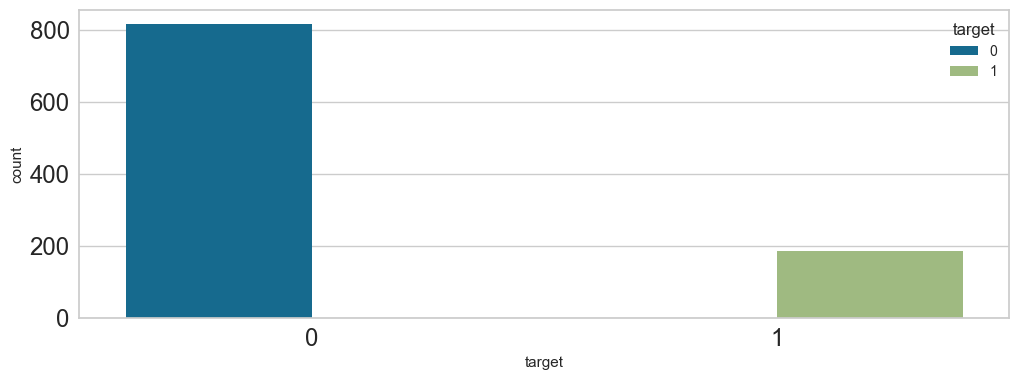

In [11]:
# Count Plot da variável target
sns.countplot(data = data, x = data['target'], hue = 'target')

# Modelo Automl - 1

In [12]:
# Nessa função ele cria o pipeline transformação modelo 
# Segunda parte setup deve ser chamada antes de executar para função.

# Model
# Raiz da base dados
model = setup(data = data,

# Features target
target = "target",

# Os valores ausentes em recursos numéricos são imputados com o valor 'médio' do recurso no conjunto de dados de treinamento. 
# A outra opção disponível é 'mediana' ou 'zero'.
numeric_imputation = 'mean',

# Controla a entrada de confirmação de tipos de dados quando setupé executado. 
# Ao executar em modo totalmente automatizado ou em um kernel remoto, deve ser True.
 silent = True)

,Description,Value
0,session_id,3256
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000, 3)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [13]:
# Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada. 
# A saída dessa função é uma grade de pontuação com pontuações médias de validação cruzada. 
# As métricas avaliadas durante o CV podem ser acessadas usando a função get_metrics. 
# As métricas personalizadas podem ser adicionadas ou removidas usando as funções add_metric e remove_metric.
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8269,0.5196,0.0000,0.0000,0.0000,0.0000,0.0000,1.4470
nb,Naive Bayes,0.8269,0.5212,0.0000,0.0000,0.0000,0.0000,0.0000,0.0270
ridge,Ridge Classifier,0.8269,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0670
rf,Random Forest Classifier,0.8269,0.5623,0.0000,0.0000,0.0000,0.0000,0.0000,0.2330
gbc,Gradient Boosting Classifier,0.8269,0.4996,0.0000,0.0000,0.0000,0.0000,0.0000,0.2780
lda,Linear Discriminant Analysis,0.8269,0.5196,0.0000,0.0000,0.0000,0.0000,0.0000,0.2220
et,Extra Trees Classifier,0.8269,0.5550,0.0000,0.0000,0.0000,0.0000,0.0000,0.3450
dummy,Dummy Classifier,0.8269,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0180
ada,Ada Boost Classifier,0.8240,0.5215,0.0000,0.0000,0.0000,-0.0054,-0.0110,0.1260
dt,Decision Tree Classifier,0.8198,0.4957,0.0000,0.0000,0.0000,-0.0130,-0.0211,0.0500


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3256, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# # Modelo regressão logistica
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.6121,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8286,0.4540,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.6049,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.3879,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.5273,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8286,0.5891,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8286,0.5374,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8286,0.6006,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8143,0.4966,0.0000,0.0000,0.0000,0.0000,0.0000


In [23]:
# Previsão do modelo Logistic Regression
model_pred_lr = predict_model(lr)
model_pred_lr.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7973,0.5425,0.0000,0.0000,0.0000,0.0000,0.0000


,Unnamed 0,email_aaron17@yahoo.com,email_abaird@yahoo.com,email_acevedomatthew@gardner-edwards.info,email_adamweaver@johnson-white.com,email_adrian30@watson.biz,email_adrian61@ellis.com,email_adrianrowland@thompson.info,email_ahamilton@brewer.com,email_ahernandez@yahoo.com,...,email_ysimpson@gmail.com,email_yudonald@gmail.com,email_yujustin@parker.com,email_zblack@holmes-phillips.info,email_zgordon@riddle-nguyen.com,email_zsmith@yahoo.com,email_ztaylor@gmail.com,target,Label,Score
0,689265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8584
1,470822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7740
2,74183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5483
3,409309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7446
4,774086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8833


In [15]:
# Tuned logistic regression
Tuned_Logistic_Regression = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.6121,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8286,0.4540,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.6049,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.3879,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.5273,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8286,0.5891,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8286,0.5374,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8286,0.6006,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8143,0.4966,0.0000,0.0000,0.0000,0.0000,0.0000


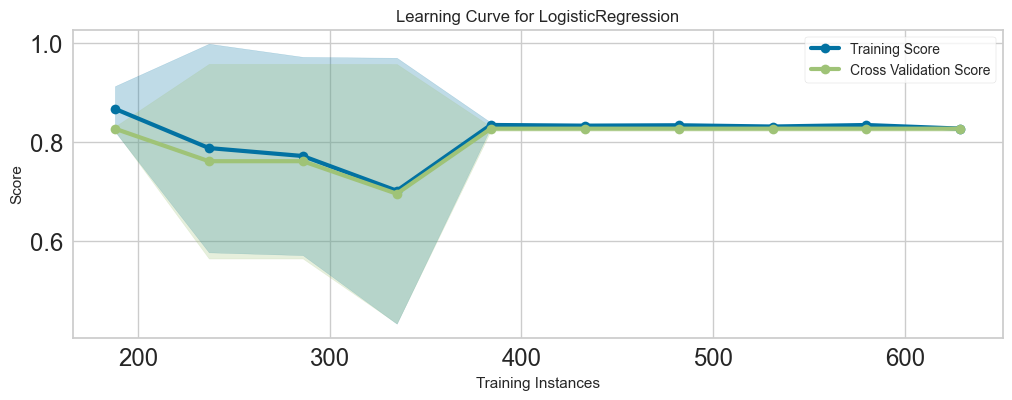

In [16]:
# Plot Tuned logistic regression
plot_model(estimator = Tuned_Logistic_Regression, plot = 'learning')

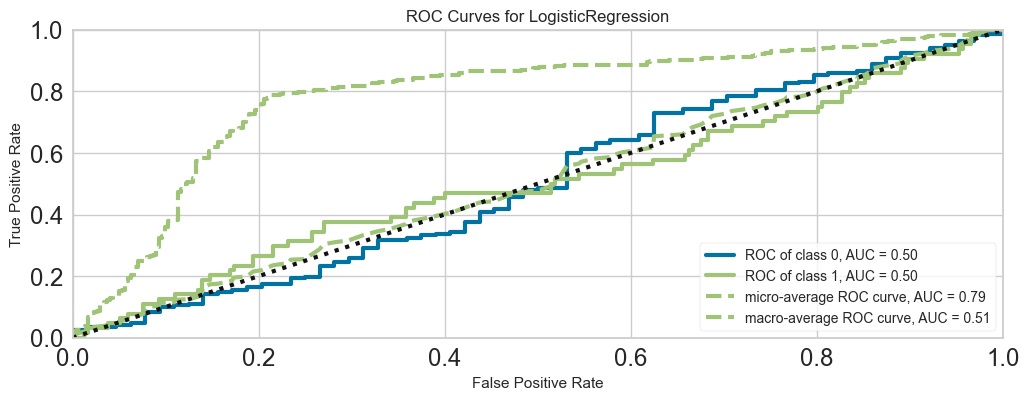

In [17]:
# Plot Tuned logistic regression - ROC
plot_model(estimator = Tuned_Logistic_Regression, plot = 'auc')

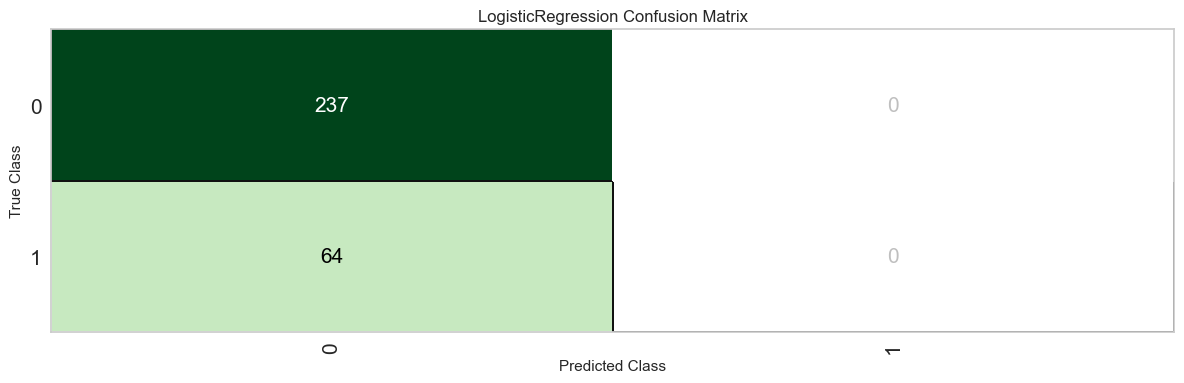

In [18]:
# Plot Tuned logistic regression - Confusion matrix
plot_model(estimator = Tuned_Logistic_Regression, plot = 'confusion_matrix')

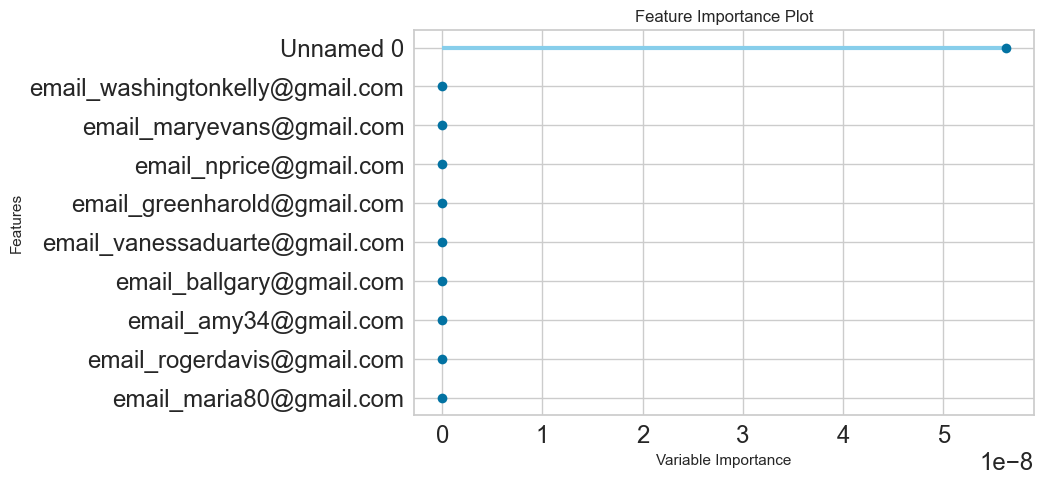

In [19]:
# Plot Tuned logistic regression - feature
plot_model( estimator = Tuned_Logistic_Regression, plot = 'feature')

In [20]:
# Evaluate model
evaluate_model(Tuned_Logistic_Regression)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Modelo Automl - 2

In [21]:
# Modelo automl 2
model = setup(data, 
             target = "target",
             session_id = 123, 
             log_experiment = True, 
             numeric_imputation = 'mean',
             silent = True)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1000, 3)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [22]:
# Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada. 
# A saída dessa função é uma grade de pontuação com pontuações médias de validação cruzada. 
# As métricas avaliadas durante o CV podem ser acessadas usando a função get_metrics. 
# As métricas personalizadas podem ser adicionadas ou removidas usando as funções add_metric e remove_metric.
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8226,0.5040,0.0000,0.0000,0.0000,0.0000,0.0000,0.0370
nb,Naive Bayes,0.8226,0.5714,0.0000,0.0000,0.0000,0.0000,0.0000,0.0310
ridge,Ridge Classifier,0.8226,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780
rf,Random Forest Classifier,0.8226,0.5425,0.0000,0.0000,0.0000,0.0000,0.0000,0.2770
ada,Ada Boost Classifier,0.8226,0.5314,0.0077,0.1000,0.0143,0.0092,0.0195,0.1410
gbc,Gradient Boosting Classifier,0.8226,0.4775,0.0000,0.0000,0.0000,0.0000,0.0000,0.3310
lda,Linear Discriminant Analysis,0.8226,0.4171,0.0000,0.0000,0.0000,0.0000,0.0000,0.2560
et,Extra Trees Classifier,0.8226,0.5447,0.0000,0.0000,0.0000,0.0000,0.0000,0.3950
dummy,Dummy Classifier,0.8226,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200
dt,Decision Tree Classifier,0.8025,0.4911,0.0083,0.0500,0.0143,-0.0230,-0.0297,0.0850


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# Modelo Ridge Classifier
ridge = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8143,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8143,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8143,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8143,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [25]:
# Modelo Logistic Regression
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.4799,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8286,0.4397,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.6580,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.5718,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8143,0.5223,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8143,0.4143,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8143,0.3968,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8143,0.3752,0.0000,0.0000,0.0000,0.0000,0.0000


In [26]:
# Previsão do modelo Logistic Regression
model_pred_lr = predict_model(lr)
model_pred_lr.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7973,0.5425,0.0000,0.0000,0.0000,0.0000,0.0000


,Unnamed 0,email_aaron17@yahoo.com,email_abaird@yahoo.com,email_acevedomatthew@gardner-edwards.info,email_adamweaver@johnson-white.com,email_adrian30@watson.biz,email_adrian61@ellis.com,email_adrianrowland@thompson.info,email_ahamilton@brewer.com,email_ahernandez@yahoo.com,...,email_ysimpson@gmail.com,email_yudonald@gmail.com,email_yujustin@parker.com,email_zblack@holmes-phillips.info,email_zgordon@riddle-nguyen.com,email_zsmith@yahoo.com,email_ztaylor@gmail.com,target,Label,Score
0,689265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8438
1,470822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7599
2,74183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5453
3,409309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7314
4,774086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.8693


In [27]:
# Tuned dos modelos

model_tuned_ridge = tune_model(ridge)
model_tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8286,0.4799,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8286,0.4397,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8286,0.5201,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8286,0.6580,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8286,0.5718,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8143,0.5223,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8143,0.4143,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8143,0.3968,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8143,0.3752,0.0000,0.0000,0.0000,0.0000,0.0000


In [28]:
# Previsão do modelo Ridge Classifier
model_pred_ridge = predict_model(ridge)
model_pred_ridge.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7973,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,Unnamed 0,email_aaron17@yahoo.com,email_abaird@yahoo.com,email_acevedomatthew@gardner-edwards.info,email_adamweaver@johnson-white.com,email_adrian30@watson.biz,email_adrian61@ellis.com,email_adrianrowland@thompson.info,email_ahamilton@brewer.com,email_ahernandez@yahoo.com,...,email_ysantiago@gmail.com,email_ysimpson@gmail.com,email_yudonald@gmail.com,email_yujustin@parker.com,email_zblack@holmes-phillips.info,email_zgordon@riddle-nguyen.com,email_zsmith@yahoo.com,email_ztaylor@gmail.com,target,Label
0,689265.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,470822.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,74183.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,409309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,774086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


# Métricas do modelo

In [29]:
# Evaluate modelo Ridge Classifier
evaluate_model(ridge)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
# Evaluate modelo Logistic Regression
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# Curva roc do modelos

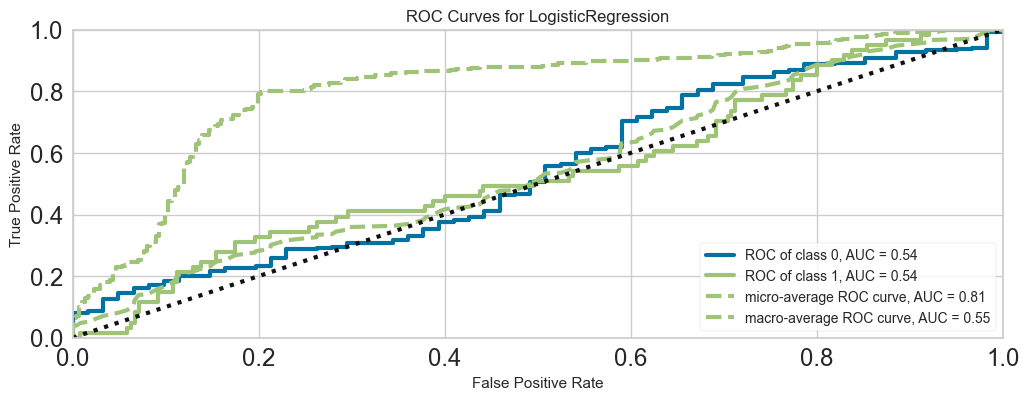

In [31]:
# Curva roc do modelo lr
plot_model(lr)

# Confusion matrix

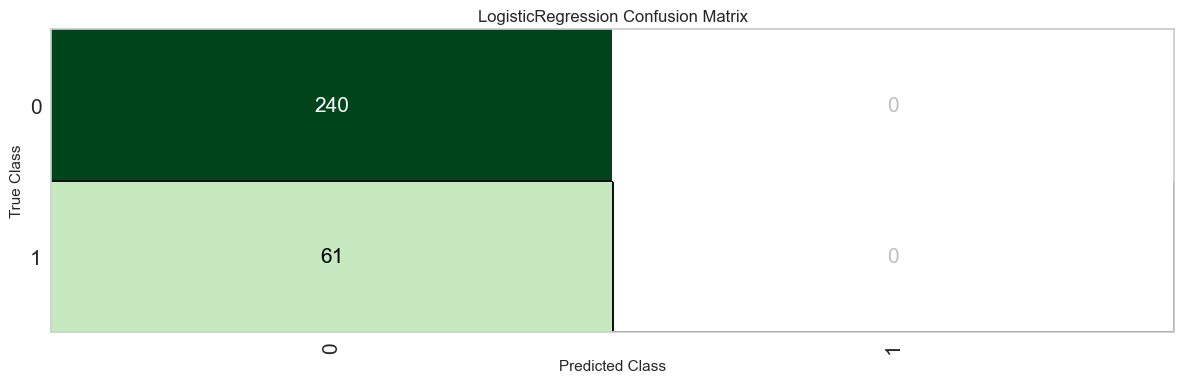

In [32]:
# plot lr - confusion matrix
plot_model(lr, plot = 'confusion_matrix')

# Class report dos modelos

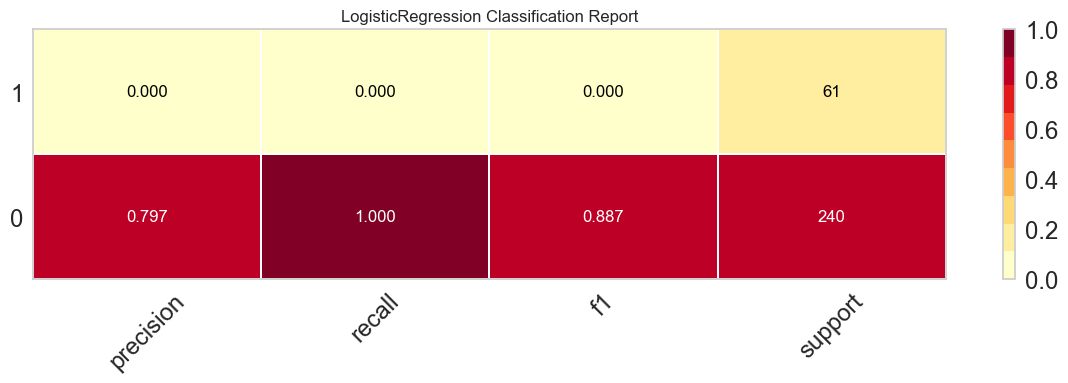

In [33]:
plot_model(lr, plot = 'class_report')

# Salvando modelo

In [34]:
save_model(lr, model_name='best-model_lr')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                 

# Referência


https://pycaret.org/

https://github.com/pycaret/pycaret

https://pycaret.readthedocs.io/en/latest/

https://medium.com/ensina-ai/pycaret-a-biblioteca-de-aprendizagem-de-m%C3%A1quinas-para-quem-tem-prazo-1c5b09667763